In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.inspection import permutation_importance


In [2]:
data1 = pd.read_csv('purchase_data.csv')  # Change this to your file path
data2 = pd.read_csv('promotion_data.csv')  # Change this to your file path
data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

print(data.head())

   customer_id_x  purchase_price  num_items            timestamp day_of_week  \
0            181           62.17         10  2023-01-01 10:29:00      Sunday   
1             20            6.63         10  2023-01-02 13:46:00      Monday   
2             62           76.99          1  2023-01-02 18:59:00      Monday   
3             12           89.32          1  2023-01-03 07:15:00     Tuesday   
4             44           11.84          3  2023-01-03 19:49:00     Tuesday   

   hour_of_day  is_weekend  customer_id_y  promotion_timestamp  clicked  
0           10           1            181  2023-01-14 03:29:00        0  
1           13           0             20  2023-01-08 14:46:00        0  
2           18           0             62  2023-01-19 21:59:00        1  
3            7           0             12  2023-01-03 22:15:00        1  
4           19           0             44  2023-01-22 22:49:00        0  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id_x        1000 non-null   int64  
 1   purchase_price       1000 non-null   float64
 2   num_items            1000 non-null   int64  
 3   timestamp            1000 non-null   object 
 4   day_of_week          1000 non-null   object 
 5   hour_of_day          1000 non-null   int64  
 6   is_weekend           1000 non-null   int64  
 7   customer_id_y        1000 non-null   int64  
 8   promotion_timestamp  1000 non-null   object 
 9   clicked              1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB
None


In [4]:
print(data.isnull().sum())


customer_id_x          0
purchase_price         0
num_items              0
timestamp              0
day_of_week            0
hour_of_day            0
is_weekend             0
customer_id_y          0
promotion_timestamp    0
clicked                0
dtype: int64


In [5]:
# Convert time column to datetime (assuming column name is 'timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['promotion_timestamp'] = pd.to_datetime(data['promotion_timestamp'])
data['month'] = data['timestamp'].dt.month
data['day_of_week'] = data['timestamp'].dt.weekday
data['promotion_month'] = data['promotion_timestamp'].dt.month
data['promotion_day_of_week'] = data['promotion_timestamp'].dt.weekday
data['promotion_hour'] = data['promotion_timestamp'].dt.hour


In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id_x          1000 non-null   int64         
 1   purchase_price         1000 non-null   float64       
 2   num_items              1000 non-null   int64         
 3   timestamp              1000 non-null   datetime64[ns]
 4   day_of_week            1000 non-null   int32         
 5   hour_of_day            1000 non-null   int64         
 6   is_weekend             1000 non-null   int64         
 7   customer_id_y          1000 non-null   int64         
 8   promotion_timestamp    1000 non-null   datetime64[ns]
 9   clicked                1000 non-null   int64         
 10  month                  1000 non-null   int32         
 11  promotion_month        1000 non-null   int32         
 12  promotion_day_of_week  1000 non-null   int32         
 13  prom

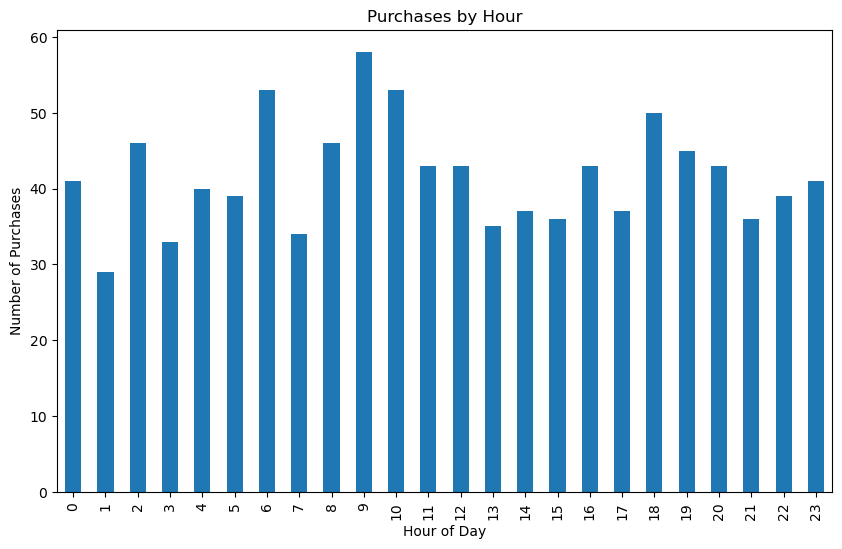

In [7]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


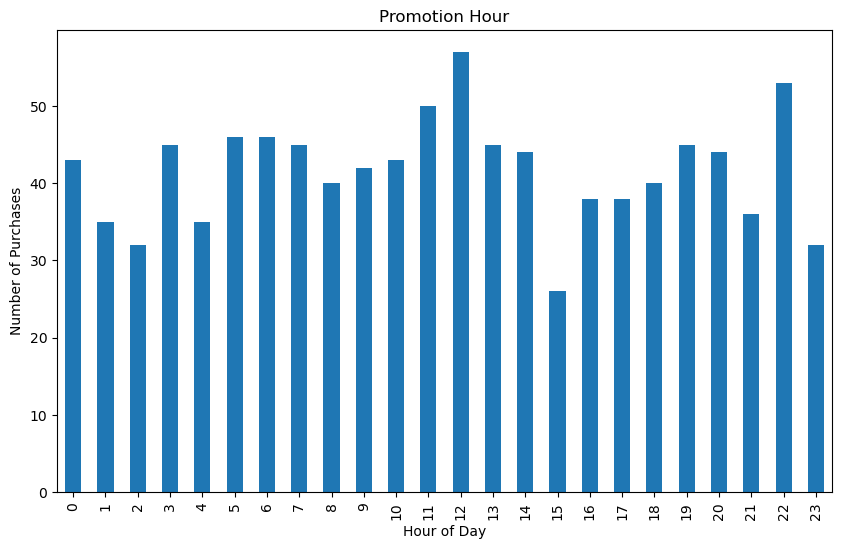

In [8]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('promotion_hour').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Promotion Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


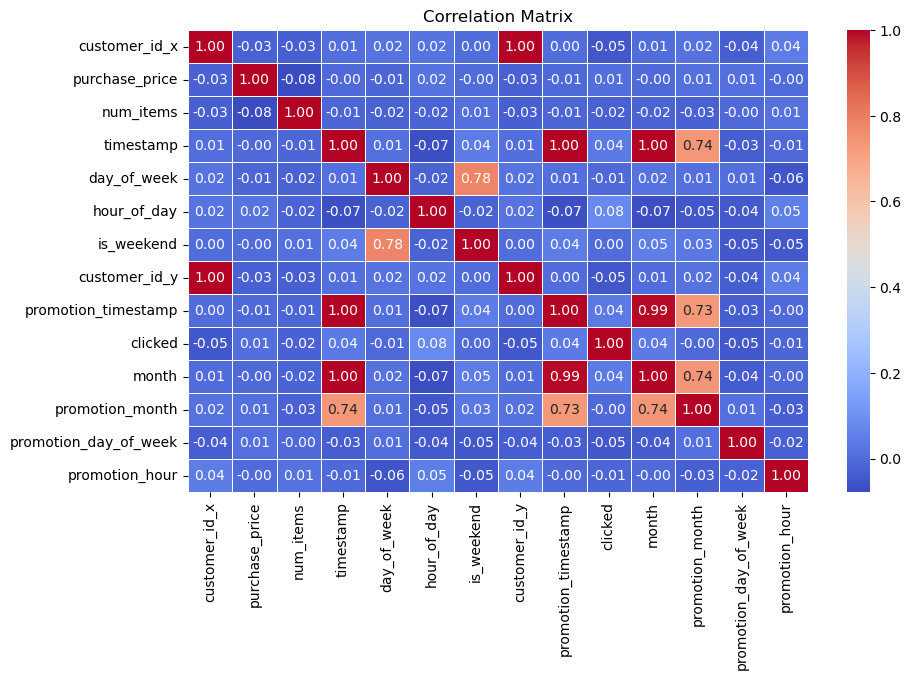

In [9]:
# Plot correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Calculate time difference base on hours
data['promotion_diff_hours'] = (data['promotion_timestamp']- data['timestamp']).dt.total_seconds() / 3600

# check the new feature
print(data[['promotion_timestamp', 'timestamp', 'promotion_diff_hours']].head())

  promotion_timestamp           timestamp  promotion_diff_hours
0 2023-01-14 03:29:00 2023-01-01 10:29:00                 305.0
1 2023-01-08 14:46:00 2023-01-02 13:46:00                 145.0
2 2023-01-19 21:59:00 2023-01-02 18:59:00                 411.0
3 2023-01-03 22:15:00 2023-01-03 07:15:00                  15.0
4 2023-01-22 22:49:00 2023-01-03 19:49:00                 459.0


In [11]:
data = data.drop(['customer_id_y','timestamp','promotion_timestamp'], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id_x          1000 non-null   int64  
 1   purchase_price         1000 non-null   float64
 2   num_items              1000 non-null   int64  
 3   day_of_week            1000 non-null   int32  
 4   hour_of_day            1000 non-null   int64  
 5   is_weekend             1000 non-null   int64  
 6   clicked                1000 non-null   int64  
 7   month                  1000 non-null   int32  
 8   promotion_month        1000 non-null   int32  
 9   promotion_day_of_week  1000 non-null   int32  
 10  promotion_hour         1000 non-null   int32  
 11  promotion_diff_hours   1000 non-null   float64
dtypes: float64(2), int32(5), int64(5)
memory usage: 74.3 KB


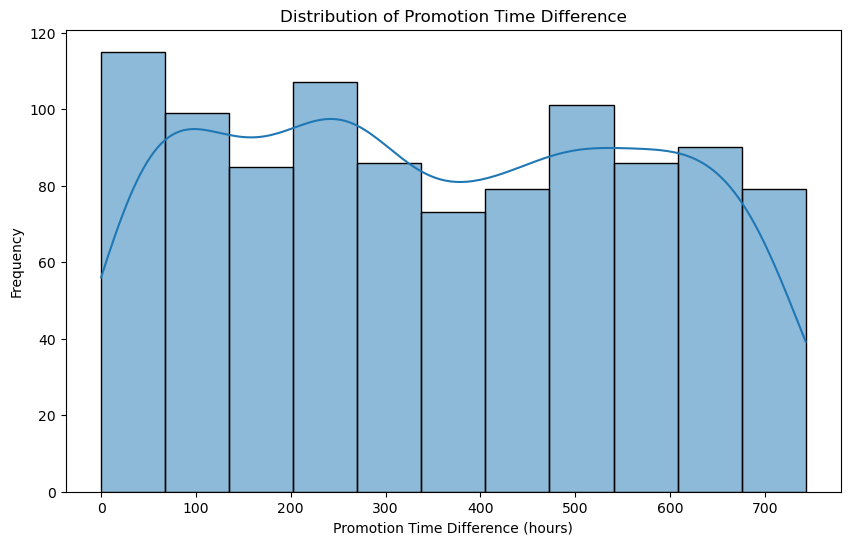

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['promotion_diff_hours'], kde=True)
plt.title('Distribution of Promotion Time Difference')
plt.xlabel('Promotion Time Difference (hours)')
plt.ylabel('Frequency')
plt.show()


#Feature Engineerning

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standarize
data[['purchase_price', 'num_items']] = scaler.fit_transform(data[['purchase_price', 'num_items']])


In [16]:
data['promotion_diff_hours_log'] = np.log1p(data['promotion_diff_hours'])


In [17]:
from sklearn.model_selection import train_test_split

# Feature Selection
X = data.drop(columns=['promotion_diff_hours', 'customer_id_x','promotion_diff_hours_log'])


y = data['promotion_diff_hours_log']  

# train/test split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
print(x_train)

# Prediction
y_pred = model.predict(x_val)

# Moudle Evaluation
mae_rf = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae_rf}')


     purchase_price  num_items  day_of_week  hour_of_day  is_weekend  clicked  \
29         1.631134  -0.505620            2           18           0        1   
535        1.450767  -1.538199            2           17           0        1   
695       -0.214988   1.215346            3            6           0        0   
557       -1.417308  -0.849813            6            7           1        1   
836        0.742005   1.559539            1            8           0        0   
..              ...        ...          ...          ...         ...      ...   
106        0.318126   0.182766            3            9           0        1   
270       -1.143311   1.215346            5           16           1        0   
860       -0.695480  -0.505620            3           18           0        1   
435        1.429719   0.526959            0           12           0        0   
102       -0.610923  -0.161427            2           19           0        0   

     month  promotion_month


Feature Importances (Random Forest Regressor):
                 Feature  Importance
0         purchase_price    0.232090
9         promotion_hour    0.146868
3            hour_of_day    0.130491
7        promotion_month    0.094044
6                  month    0.091429
1              num_items    0.090938
2            day_of_week    0.088390
8  promotion_day_of_week    0.087747
5                clicked    0.027256
4             is_weekend    0.010745


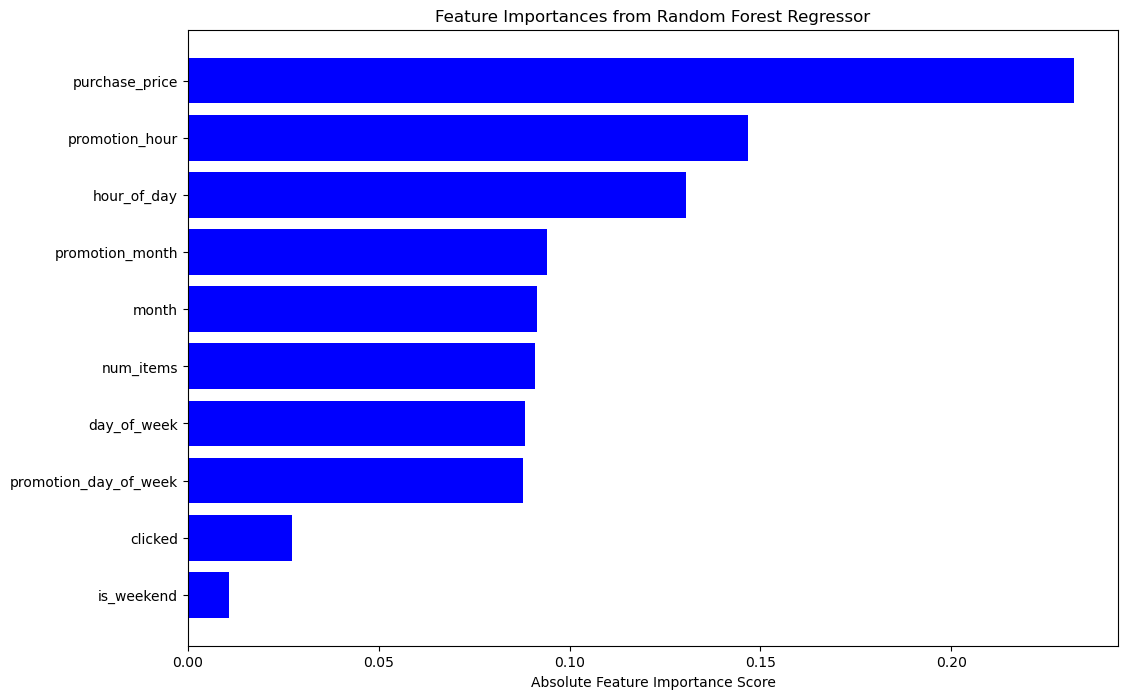

In [19]:
# Extract Feature Importance (Taking Absolute Values)
feature_importances = np.abs(model.feature_importances_)
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (Random Forest Regressor):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_rf = mean_squared_error(y_val, y_pred)
rmse_rf = np.sqrt(mse_rf)

# R²
r2_rf = r2_score(y_val, y_pred)

print(f'MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}')

MSE: 1.0102259685262007, RMSE: 1.0050999793683217, R²: 0.06371584022700816


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/en

Mean Absolute Error (Optimized MAE RF): 0.7548
Mean Squared Error (Optimized MSE RF): 0.9791
Root Mean Squared Error (Optimized RMSE RF): 0.9895
R² Score (Optimized R² RF): 0.0926

Feature Importances (Random Forest Regressor):
                 Feature  Importance
0         purchase_price    0.233381
9         promotion_hour    0.135294
3            hour_of_day    0.129557
7        promotion_month    0.107181
6                  month    0.106840
1              num_items    0.088930
8  promotion_day_of_week    0.082469
2            day_of_week    0.080889
5                clicked    0.028116
4             is_weekend    0.007342


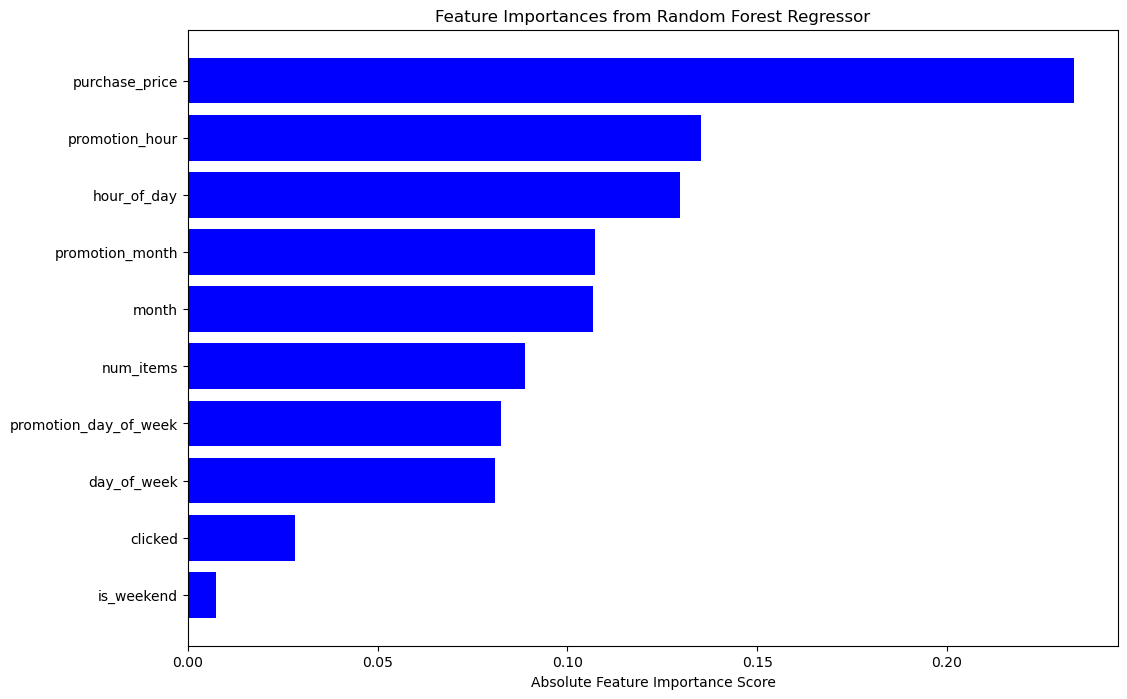

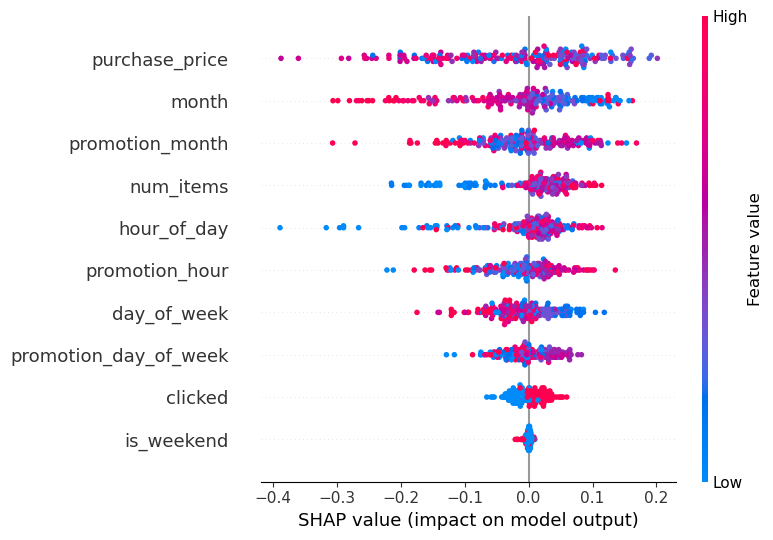

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import shap

# RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)

# hyp turning
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='neg_mean_absolute_error', 
                                   n_jobs=-1, verbose=1, random_state=42)
random_search.fit(x_train, y_train)

# find the best
best_model = random_search.best_estimator_

# training
best_model.fit(x_train, y_train)

# pred
y_pred = best_model.predict(x_val)

# 2. evaluation
optimized_mae_rf = mean_absolute_error(y_val, y_pred)
optimized_mse_rf = mean_squared_error(y_val, y_pred)
optimized_rmse_rf = np.sqrt(optimized_mse_rf)
optimized_r2_rf = r2_score(y_val, y_pred)

print(f'Mean Absolute Error (Optimized MAE RF): {optimized_mae_rf:.4f}')
print(f'Mean Squared Error (Optimized MSE RF): {optimized_mse_rf:.4f}')
print(f'Root Mean Squared Error (Optimized RMSE RF): {optimized_rmse_rf:.4f}')
print(f'R² Score (Optimized R² RF): {optimized_r2_rf:.4f}')

# importances of feature
feature_importances = np.abs(best_model.feature_importances_)
features = x_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


print("\nFeature Importances (Random Forest Regressor):")
print(importance_df)

# visualized
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

# 6. shap analysis
explainer = shap.Explainer(best_model, x_train)
shap_values = explainer(x_val)

shap.summary_plot(shap_values, x_val)


In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# SVR
svr_model = SVR(kernel='rbf')

# train
svr_model.fit(x_train, y_train)

# prediction
y_pred_svr = svr_model.predict(x_val)

# Moudle Evaluation
mae_svr = mean_absolute_error(y_val, y_pred_svr)
print(f'Mean Absolute Error (SVR): {mae_svr}')


Mean Absolute Error (SVR): 0.7589026755555305



Feature Importances (SVR - Permutation Importance):
                 Feature  Importance
6                  month    0.073573
7        promotion_month    0.046631
3            hour_of_day    0.008350
1              num_items    0.004252
9         promotion_hour    0.003916
0         purchase_price    0.001798
8  promotion_day_of_week    0.001038
5                clicked    0.000731
4             is_weekend    0.000153
2            day_of_week    0.000112


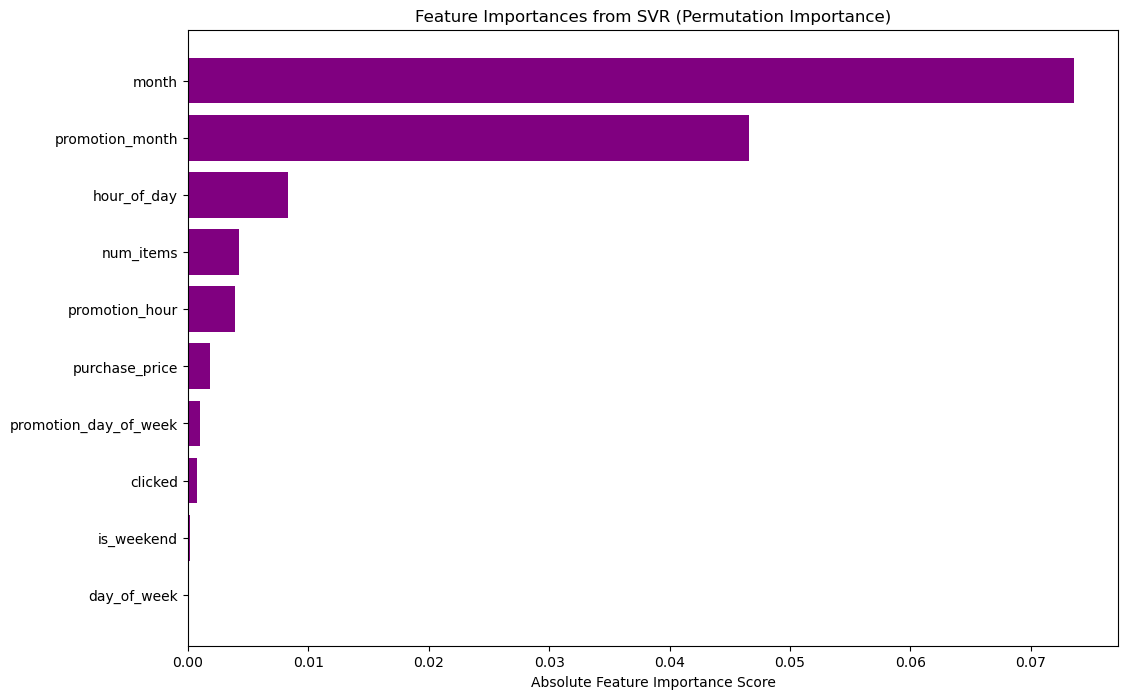

In [23]:
# Compute Feature Importance using Permutation Importance
perm_importance = permutation_importance(svr_model, x_val, y_val, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42)
feature_importances = np.abs(perm_importance.importances_mean)  # Taking absolute values
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (SVR - Permutation Importance):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from SVR (Permutation Importance)')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_svr = mean_squared_error(y_val, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# R²
r2_svr = r2_score(y_val, y_pred_svr)

print(f'MSE: {rmse_svr}, RMSE: {rmse_svr}, R²: {r2_svr}')

MSE: 1.0827844143989638, RMSE: 1.0827844143989638, R²: -0.08660860423630323


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# train
gbr_model.fit(x_train, y_train)

# prediction
y_pred_gbr = gbr_model.predict(x_val)

# Moudle Evaluation
mae_gbr = mean_absolute_error(y_val, y_pred_gbr)
print(f'Mean Absolute Error (Gradient Boosting): {mae_gbr}')


Mean Absolute Error (Gradient Boosting): 0.776255435535504



Feature Importances (Gradient Boosting Regressor):
                 Feature  Importance
0         purchase_price    0.356675
6                  month    0.172331
7        promotion_month    0.154639
3            hour_of_day    0.090096
2            day_of_week    0.084644
9         promotion_hour    0.063632
1              num_items    0.046744
8  promotion_day_of_week    0.021674
4             is_weekend    0.007278
5                clicked    0.002289


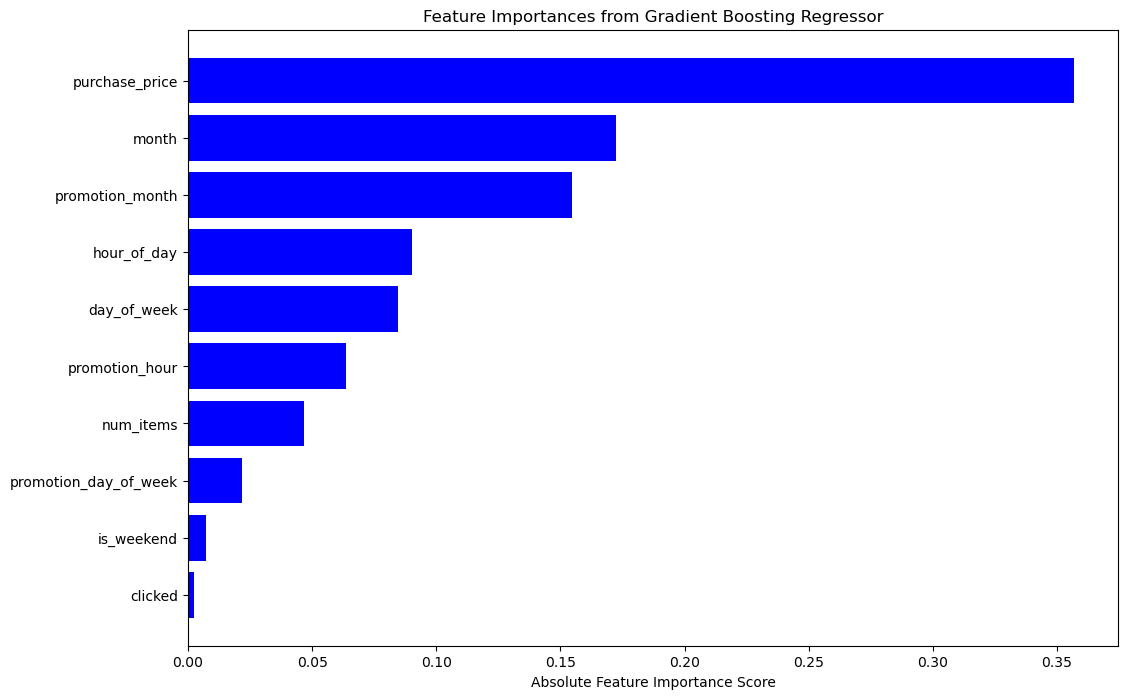

In [26]:
# Extract Feature Importance (Taking Absolute Values)
feature_importances = np.abs(gbr_model.feature_importances_)
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (Gradient Boosting Regressor):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_gbr = mean_squared_error(y_val, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

# R²
r2_gbr = r2_score(y_val, y_pred_gbr)

print(f'MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}')

MSE: 1.0400758506335408, RMSE: 1.01984109087325, R²: 0.03605077057039807


Gradient Boosting Hyperparameter Search Progress: 100%|█| 20/20 [00:21<00:00,  1


Total Hyperparameter Search Time (GBR): 21.40 seconds
Mean Absolute Error (Optimized MAE GBR): 0.7412
Mean Squared Error (Optimized MSE GBR): 0.9638
Root Mean Squared Error (Optimized RMSE GBR): 0.9817
R² Score (Optimized R² GBR): 0.1068

Feature Importances (Gradient Boosting Regressor):
                 Feature  Importance
0         purchase_price    0.331257
7        promotion_month    0.146873
6                  month    0.122923
9         promotion_hour    0.101612
3            hour_of_day    0.094754
2            day_of_week    0.071346
1              num_items    0.064238
8  promotion_day_of_week    0.048015
5                clicked    0.013742
4             is_weekend    0.005240


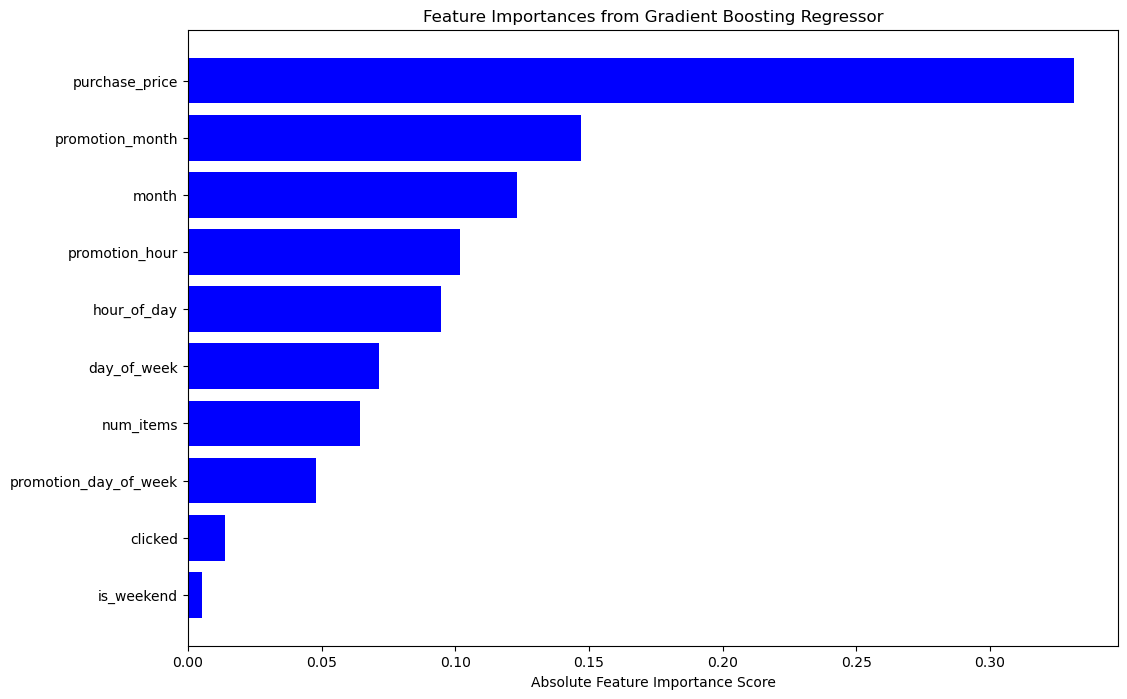

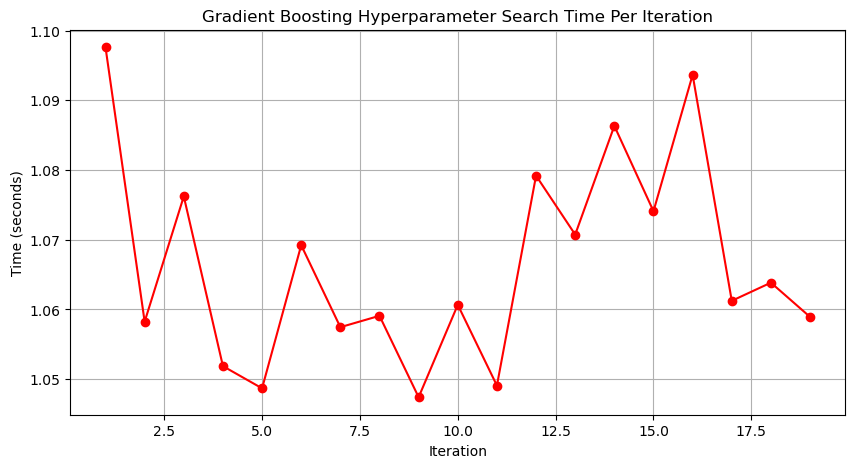

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm  # Progress bar
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# 1. Hyperparameter Optimization (RandomizedSearchCV) with Progress Bar
param_dist_gbr = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

gbr_model = GradientBoostingRegressor(random_state=42)

# Initialize timing tracking
search_times_gbr = []  # To store time taken for each iteration

# Define a custom function to track progress
def track_search_progress_gbr(cv_results):
    global search_times_gbr
    search_times_gbr.append(time.time())  # Log the timestamp of each iteration

# Performing hyperparameter search with progress tracking
random_search_gbr = RandomizedSearchCV(gbr_model, param_distributions=param_dist_gbr,
                                       n_iter=20, cv=4, scoring='neg_mean_absolute_error', 
                                       n_jobs=-1, verbose=0, random_state=42)

# Start the timer
start_time_gbr = time.time()

# Using tqdm to visualize the search process
with tqdm(total=20, desc="Gradient Boosting Hyperparameter Search Progress") as pbar:
    for _ in range(20):
        random_search_gbr.fit(x_train, y_train)
        track_search_progress_gbr(random_search_gbr.cv_results_)  # Track progress
        pbar.update(1)  # Update progress bar

# Calculate total elapsed time
total_time_gbr = time.time() - start_time_gbr
print(f"\nTotal Hyperparameter Search Time (GBR): {total_time_gbr:.2f} seconds")

# Selecting the best model
best_gbr_model = random_search_gbr.best_estimator_

# Train the best GBR model
best_gbr_model.fit(x_train, y_train)

# Prediction
y_pred_gbr = best_gbr_model.predict(x_val)

# 2. Model Evaluation
optimized_mae_gbr = mean_absolute_error(y_val, y_pred_gbr)
optimized_mse_gbr = mean_squared_error(y_val, y_pred_gbr)
optimized_rmse_gbr = np.sqrt(optimized_mse_gbr)
optimized_r2_gbr = r2_score(y_val, y_pred_gbr)

print(f'Mean Absolute Error (Optimized MAE GBR): {optimized_mae_gbr:.4f}')
print(f'Mean Squared Error (Optimized MSE GBR): {optimized_mse_gbr:.4f}')
print(f'Root Mean Squared Error (Optimized RMSE GBR): {optimized_rmse_gbr:.4f}')
print(f'R² Score (Optimized R² GBR): {optimized_r2_gbr:.4f}')

# 3. Extract Feature Importance
feature_importances_gbr = np.abs(best_gbr_model.feature_importances_)
features_gbr = x_train.columns

# 4. Creating a DataFrame for Feature Importance
importance_df_gbr = pd.DataFrame({
    'Feature': features_gbr,
    'Importance': feature_importances_gbr
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (Gradient Boosting Regressor):")
print(importance_df_gbr)

# 5. Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df_gbr['Feature'], importance_df_gbr['Importance'], color='blue')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

# 6. Visualization of CV Running Time Trend
if len(search_times_gbr) > 1:
    iteration_times_gbr = np.diff(search_times_gbr)  # Compute time differences between iterations
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(iteration_times_gbr) + 1), iteration_times_gbr, marker='o', linestyle='-', color='red')
    plt.xlabel("Iteration")
    plt.ylabel("Time (seconds)")
    plt.title("Gradient Boosting Hyperparameter Search Time Per Iteration")
    plt.grid()
    plt.show()


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# train
knn_model.fit(x_train, y_train)

# prediction
y_pred_knn = knn_model.predict(x_val)

# Moudle Evaluation
mae_knn = mean_absolute_error(y_val, y_pred_knn)
print(f'Mean Absolute Error (KNN): {mae_knn}')


Mean Absolute Error (KNN): 0.853444456779851



Feature Importances (KNN Regressor - Permutation Importance):
                 Feature  Importance
7        promotion_month    0.017997
9         promotion_hour    0.017361
6                  month    0.017014
8  promotion_day_of_week    0.015420
3            hour_of_day    0.014694
1              num_items    0.010767
0         purchase_price    0.006626
5                clicked    0.005578
4             is_weekend    0.001419
2            day_of_week    0.001231


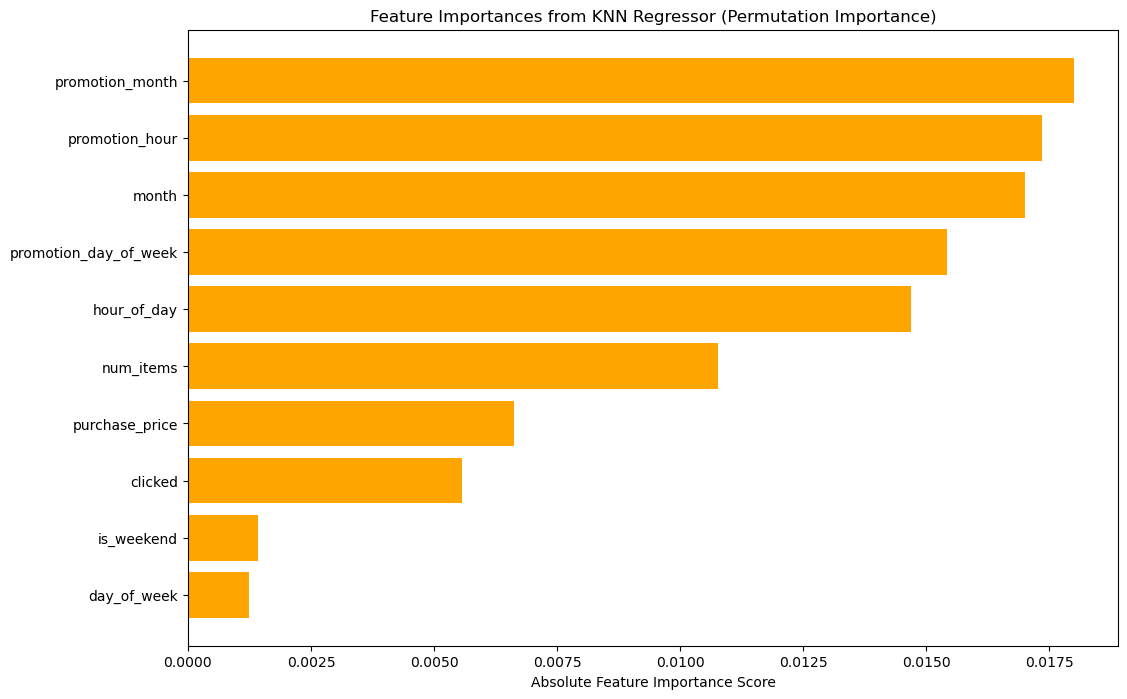

In [30]:
# Compute Feature Importance using Permutation Importance
perm_importance = permutation_importance(knn_model, x_val, y_val, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42)
feature_importances = np.abs(perm_importance.importances_mean)  # Taking absolute values
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (KNN Regressor - Permutation Importance):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from KNN Regressor (Permutation Importance)')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_knn = mean_squared_error(y_val, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

# R²
r2_knn = r2_score(y_val, y_pred_knn)

print(f'MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}')

MSE: 1.227500221173298, RMSE: 1.1079260901221244, R²: -0.1376553850413078


KNN Hyperparameter Search Progress: 100%|███████| 20/20 [00:01<00:00, 19.18it/s]



Total Hyperparameter Search Time (KNN): 1.04 seconds
Mean Absolute Error (Optimized MAE KNN): 0.7869
Mean Squared Error (Optimized MSE KNN): 1.0629
Root Mean Squared Error (Optimized RMSE KNN): 1.0310
R² Score (Optimized R² KNN): 0.0149

Feature Importances (KNN Regressor - Permutation Importance):
                 Feature  Importance
6                  month    0.016278
9         promotion_hour    0.015537
2            day_of_week    0.014802
8  promotion_day_of_week    0.013289
3            hour_of_day    0.011722
0         purchase_price    0.006052
4             is_weekend    0.006032
5                clicked    0.004050
7        promotion_month    0.001660
1              num_items    0.000419


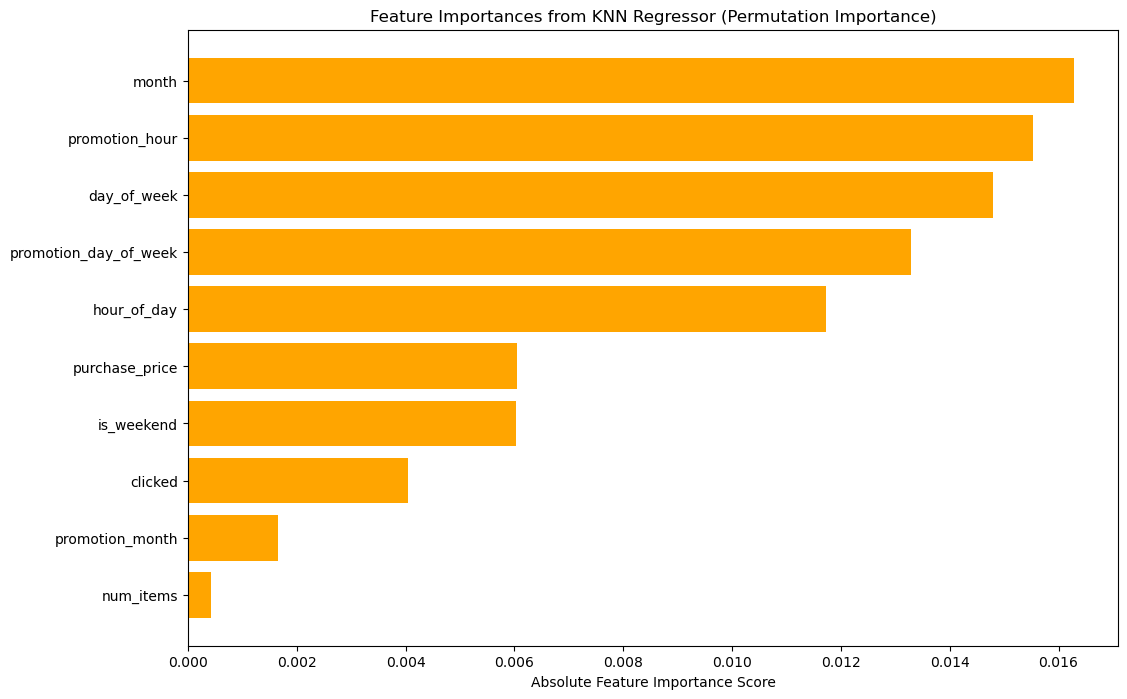

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm  # Progress bar
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

# 1. Hyperparameter Optimization (RandomizedSearchCV) with Progress Bar
param_dist_knn = {
    'n_neighbors': list(range(1, 20, 2)),  # Odd numbers from 1 to 19
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan Distance, 2 = Euclidean Distance
}

knn_model = KNeighborsRegressor()

# Initialize timing tracking
search_times_knn = []  # To store time taken for each iteration

# Define a custom function to track progress
def track_search_progress_knn(cv_results):
    global search_times_knn
    search_times_knn.append(time.time())  # Log the timestamp of each iteration

# Performing hyperparameter search with progress tracking
random_search_knn = RandomizedSearchCV(knn_model, param_distributions=param_dist_knn,
                                       n_iter=20, cv=5, scoring='neg_mean_absolute_error', 
                                       n_jobs=-1, verbose=0, random_state=42)

# Start the timer
start_time_knn = time.time()

# Using tqdm to visualize the search process
with tqdm(total=20, desc="KNN Hyperparameter Search Progress") as pbar:
    for _ in range(20):
        random_search_knn.fit(x_train, y_train)
        track_search_progress_knn(random_search_knn.cv_results_)  # Track progress
        pbar.update(1)  # Update progress bar

# Calculate total elapsed time
total_time_knn = time.time() - start_time_knn
print(f"\nTotal Hyperparameter Search Time (KNN): {total_time_knn:.2f} seconds")

# Selecting the best model
best_knn_model = random_search_knn.best_estimator_

# Train the best KNN model
best_knn_model.fit(x_train, y_train)

# Prediction
y_pred_knn = best_knn_model.predict(x_val)

# 2. Model Evaluation
optimized_mae_knn = mean_absolute_error(y_val, y_pred_knn)
optimized_mse_knn = mean_squared_error(y_val, y_pred_knn)
optimized_rmse_knn = np.sqrt(optimized_mse_knn)
optimized_r2_knn = r2_score(y_val, y_pred_knn)

print(f'Mean Absolute Error (Optimized MAE KNN): {optimized_mae_knn:.4f}')
print(f'Mean Squared Error (Optimized MSE KNN): {optimized_mse_knn:.4f}')
print(f'Root Mean Squared Error (Optimized RMSE KNN): {optimized_rmse_knn:.4f}')
print(f'R² Score (Optimized R² KNN): {optimized_r2_knn:.4f}')

# 3. Compute Feature Importance using Permutation Importance
perm_importance_knn = permutation_importance(best_knn_model, x_val, y_val, 
                                             scoring='neg_mean_absolute_error', 
                                             n_repeats=10, random_state=42)

feature_importances_knn = np.abs(perm_importance_knn.importances_mean)  # Taking absolute values
features_knn = x_train.columns

# 4. Creating a DataFrame for Feature Importance
importance_df_knn = pd.DataFrame({
    'Feature': features_knn,
    'Importance': feature_importances_knn
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (KNN Regressor - Permutation Importance):")
print(importance_df_knn)

# 5. Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df_knn['Feature'], importance_df_knn['Importance'], color='orange')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from KNN Regressor (Permutation Importance)')
plt.show()


In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Lasso
lasso_model = Lasso(alpha=0.1)

# train
lasso_model.fit(x_train, y_train)

# prediction
y_pred_lasso = lasso_model.predict(x_val)

# moudle evaluation
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
print(f'Mean Absolute Error (Lasso): {mae_lasso}')


Mean Absolute Error (Lasso): 0.7970339988105085



Feature Importances (Lasso):
                 Feature  Coefficient  Importance
7        promotion_month    -0.012853    0.012853
9         promotion_hour     0.004797    0.004797
3            hour_of_day     0.002882    0.002882
0         purchase_price    -0.000000    0.000000
1              num_items     0.000000    0.000000
2            day_of_week    -0.000000    0.000000
4             is_weekend    -0.000000    0.000000
5                clicked     0.000000    0.000000
6                  month    -0.000000    0.000000
8  promotion_day_of_week     0.000000    0.000000


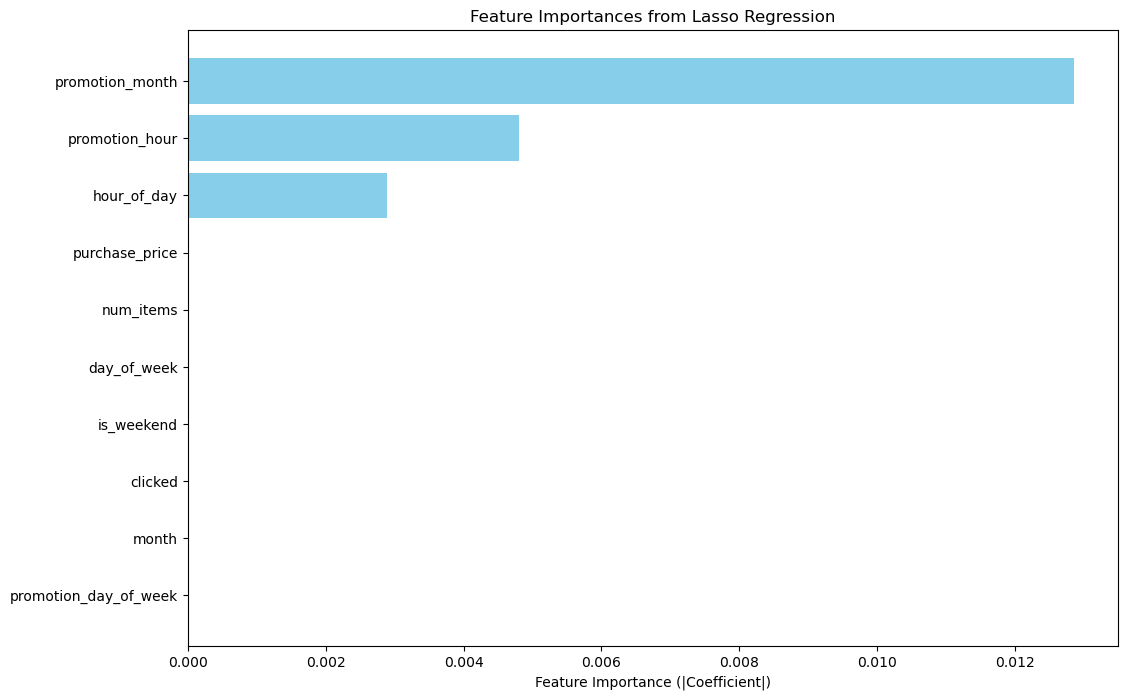

In [34]:
#Feature Importance
lasso_coefficients = lasso_model.coef_
features = x_train.columns

# create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lasso_coefficients,
    'Importance': np.abs(lasso_coefficients)
}).sort_values(by='Importance', ascending=False)

#  Print the ranking
print("\nFeature Importances (Lasso):")
print(importance_df)

#  Visualization
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (|Coefficient|)')
plt.title('Feature Importances from Lasso Regression')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# R²
r2_lasso = r2_score(y_val, y_pred_lasso)

print(f'MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}')

MSE: 1.087150216478155, RMSE: 1.042664958880922, R²: -0.007578065397827238


MAE: 0.8072, MSE: 1.1005, RMSE: 1.0490, R²: -0.0200

Feature Importances (Lasso Regression):
                 Feature  Coefficient  Importance
7        promotion_month    -0.070689    0.070689
2            day_of_week    -0.061109    0.061109
9         promotion_hour     0.039964    0.039964
1              num_items     0.039764    0.039764
4             is_weekend     0.029604    0.029604
3            hour_of_day     0.025436    0.025436
5                clicked     0.024028    0.024028
0         purchase_price    -0.010257    0.010257
6                  month     0.005567    0.005567
8  promotion_day_of_week     0.001016    0.001016


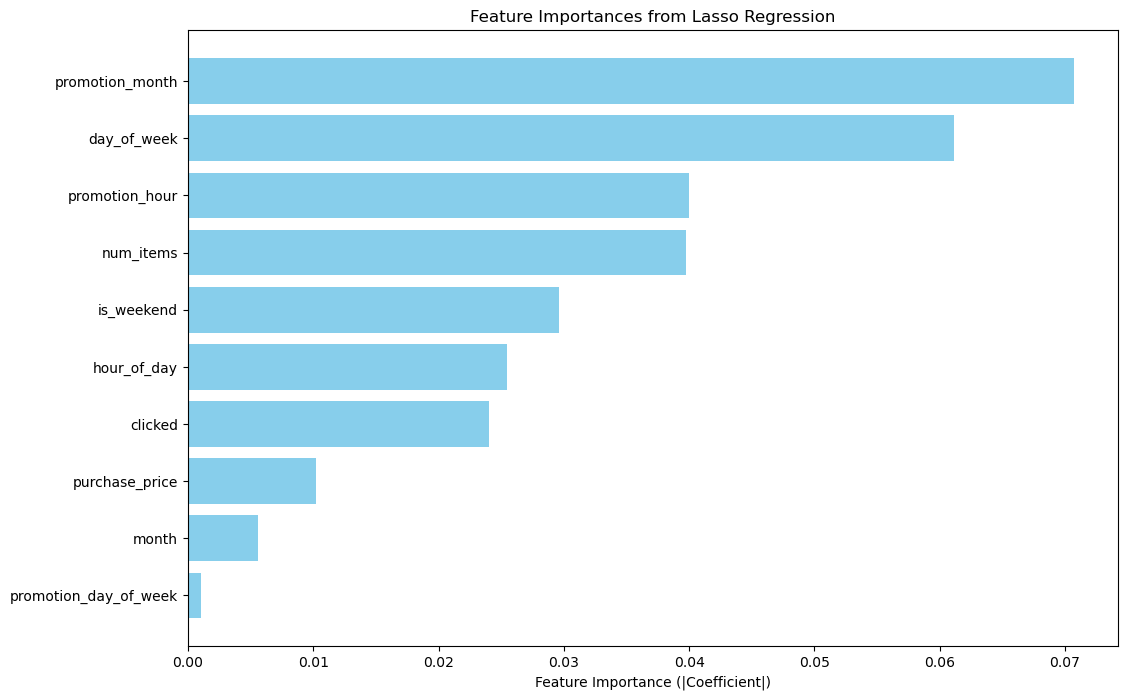

In [36]:
# 1. Standardize the Data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# 2. Train Lasso Model with Fixed Alpha
best_lasso_model = Lasso(alpha=0.005, max_iter=10000, random_state=42)
best_lasso_model.fit(x_train_scaled, y_train)

# 3. Prediction
y_pred_lasso = best_lasso_model.predict(x_val_scaled)

# 4. Model Evaluation
optimized_mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
optimized_mse_lasso = mean_squared_error(y_val, y_pred_lasso)
optimized_rmse_lasso = np.sqrt(optimized_mse_lasso)
optimized_r2_lasso = r2_score(y_val, y_pred_lasso)

print(f'MAE: {optimized_mae_lasso:.4f}, MSE: {optimized_mse_lasso:.4f}, RMSE: {optimized_rmse_lasso:.4f}, R²: {optimized_r2_lasso:.4f}')

# 5. Feature Importance
lasso_coefficients = best_lasso_model.coef_
importance_df_lasso = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lasso_coefficients,
    'Importance': np.abs(lasso_coefficients)
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Lasso Regression):")
print(importance_df_lasso)

# 6. Visualization
plt.figure(figsize=(12, 8))
plt.barh(importance_df_lasso['Feature'], importance_df_lasso['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (|Coefficient|)')
plt.title('Feature Importances from Lasso Regression')
plt.show()



In [37]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# train
lgb_model.fit(x_train, y_train)

# prediction

y_pred_lgb = lgb_model.predict(x_val)

# moudle evaluation
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 5.542862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be


Feature Importances (LightGBM Regressor):
                 Feature  Importance
0         purchase_price         787
9         promotion_hour         401
3            hour_of_day         389
7        promotion_month         309
6                  month         290
1              num_items         230
2            day_of_week         224
8  promotion_day_of_week         196
5                clicked          98
4             is_weekend           0


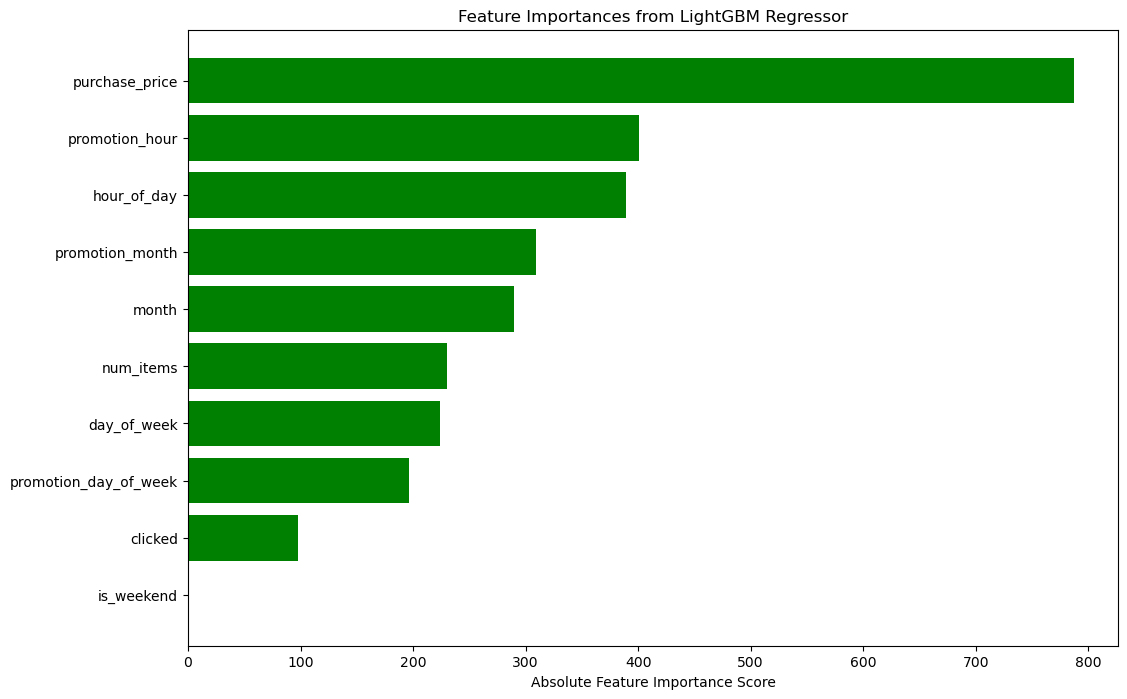

In [38]:
feature_importances = np.abs(lgb_model.feature_importances_)
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (LightGBM Regressor):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from LightGBM Regressor')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

# R²
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f'MSE: {mse_lgb}, RMSE: {rmse_lgb}, R²: {r2_lgb}')

MSE: 0.952201714670876, RMSE: 0.9758082366279125, R²: 0.1174931053735816


In [87]:
# compare MAE
models = ['Random Forest', 'SVR', 'Gradient Boosting', 'KNN', 'Lasso',  'LightGBM']
mae_values = [mae_rf, mae_svr, mae_gbr, mae_knn, mae_lasso, mae_lgb]
mse_values = [mse_rf, mse_svr, mse_gbr, mse_knn, mse_lasso, mse_lgb]
rmse_values = [rmse_rf, rmse_svr, rmse_gbr, rmse_knn, rmse_lasso, rmse_lgb]
r2_values = [r2_rf, r2_svr,r2_gbr, r2_knn, r2_lasso, r2_lgb]
opt_rmse_values = [optimized_mse_rf, mse_svr, optimized_mse_gbr, optimized_mse_knn, optimized_mse_lasso, mse_lgb]
opt_r2_values = [optimized_r2_rf, r2_svr,optimized_r2_gbr, optimized_r2_knn, optimized_r2_lasso, r2_lgb]

# Create DataFrame to display the results
results = pd.DataFrame({'Model': models, 'Mean Absolute Error': mae_values,'Mean Standard Error':mse_values, 'R-Squared':r2_values, 'Optimized Mean Standard Error':opt_rmse_values
                       ,'Optimized R-Squared':opt_r2_values})
results = results.sort_values(by='Optimized R-Squared', ascending=True)

# Display results
print(results)

               Model  Mean Absolute Error  Mean Standard Error  R-Squared  \
1                SVR             0.758903             1.172422  -0.086609   
4              Lasso             0.797034             1.087150  -0.007578   
3                KNN             0.853444             1.227500  -0.137655   
0      Random Forest             0.779442             1.010226   0.063716   
2  Gradient Boosting             0.776255             1.040076   0.036051   
5           LightGBM             0.742307             0.952202   0.117493   

   Optimized Mean Standard Error  Optimized R-Squared  
1                       1.172422            -0.086609  
4                       1.100500            -0.019950  
3                       1.062868             0.014927  
0                       0.979094             0.092569  
2                       0.963762             0.106779  
5                       0.952202             0.117493  


#Final Moudle